In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# Disable SSL certificate verification
url = 'https://api.bcra.gob.ar/estadisticas/v1/principalesvariables'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}
data_json = requests.get(url, headers=headers, verify=False).json()
df = pd.DataFrame(data_json['results'])
df = df[['idVariable','descripcion']]
print(df)

id_variable=6 #1 es el id de la variable

startdate="2023-02-01"
enddate=datetime.datetime.today().strftime('%Y-%m-%d')
'''
4=dolar oficial
27=inflacion mensual
25=m2
6=tasa
7=badlar
'''
url = f'https://api.bcra.gob.ar/estadisticas/v1/datosvariable/{id_variable}/{startdate}/{enddate}'
data_json = requests.get(url, headers=headers, verify=False).json()
datahistorica = pd.DataFrame(data_json['results'])
description = df['descripcion'][df['idVariable'] == id_variable].iloc[0]
datahistorica['valor'] = datahistorica['valor'].str.replace('.', '').str.replace(',', '.').astype(float)
datahistorica['fecha'] = pd.to_datetime(datahistorica['fecha'], format='%d/%m/%Y')




/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


    idVariable                                        descripcion
0            1  Reservas Internacionales del BCRA (en millones...
1            4  Tipo de Cambio Minorista ($ por USD) Comunicac...
2            5  Tipo de Cambio Mayorista ($ por USD) Comunicac...
3            6             Tasa de Política Monetaria (en % n.a.)
4            7     BADLAR en pesos de bancos privados (en % n.a.)
5            8       TM20 en pesos de bancos privados (en % n.a.)
6            9  Tasas de interés de las operaciones de pase ac...
7           10  Tasas de interés de las operaciones de pase pa...
8           11  Tasas de interés por préstamos entre entidades...
9           12  Tasas de interés por depósitos a 30 días de pl...
10          13  Tasa de interés de préstamos por adelantos en ...
11          14            Tasa de interés de préstamos personales
12          15      Base monetaria - Total (en millones de pesos)
13          16       Circulación monetaria (en millones de pesos)
14        

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


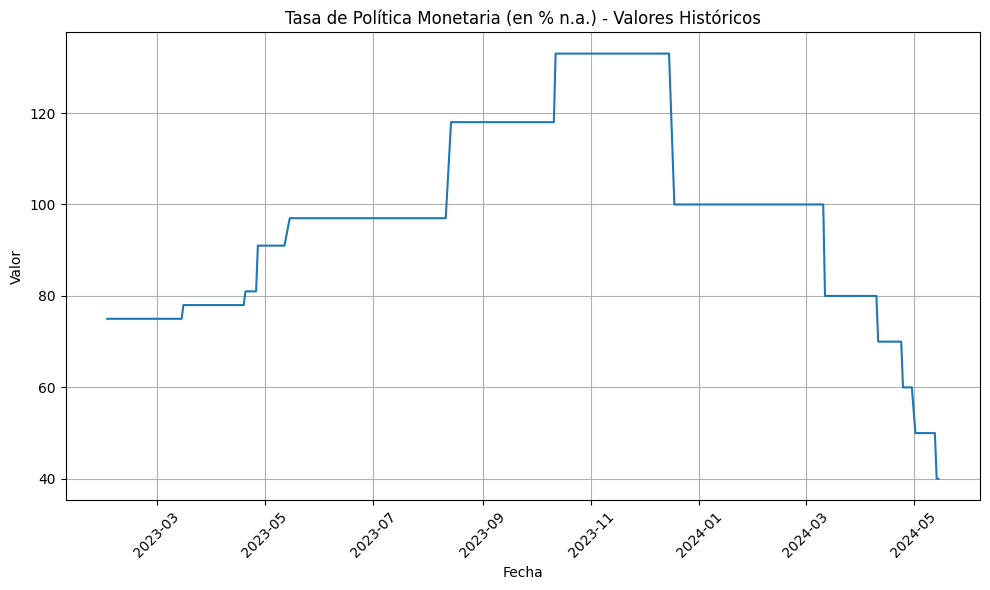

In [2]:
plt.figure(figsize=(10, 6))  # Set plot size
plt.plot(datahistorica['fecha'], datahistorica['valor'])
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title(f"{description} - Valores Históricos")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
